In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_cust_flight=pd.read_csv("Customer Flight Activity.csv", index_col=0)

df_cust_loyalty=pd.read_csv("Customer Loyalty History.csv", index_col=0)

FASE 1: EXPLORACIÓN Y LIMPIEZA

1.EXPLORACIÓN INICIAL

In [4]:
df_cust_flight.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_cust_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [17]:
df_cust_flight.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [18]:
df_cust_loyalty.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [6]:
df_cust_flight.shape

(405624, 9)

In [7]:
df_cust_loyalty.shape

(16737, 15)

In [8]:
df_cust_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [9]:
df_cust_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage

In [12]:
df_cust_flight.isnull().sum()

Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [10]:
df_cust_loyalty.isnull().sum()

Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [13]:
df_cust_flight.duplicated().sum()

228705

In [14]:
df_cust_loyalty.duplicated().sum()

0

In [15]:
df_cust_flight.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [16]:
df_cust_loyalty.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [20]:
#Después de realizar la exploración de los dos csv, comprobando los nulos, duplicados, nombres de columnas, las estadísticas básicas, etc...
#Ya sé donde hay nulos y duplicados y donde tengo que realizar la limpieza. Aún así, paso a fusionar los csv por le índice llamado Loyalty Number porque
#se da en ambos csv y me parece la forma más efcicaz de unirlos.
# Fusionar los dataframes por el índice "Loyalty Number"
df_final = pd.merge(df_cust_flight, df_cust_loyalty, left_index=True, right_index=True, how='inner')

# Guardar el resultado en un nuevo archivo CSV
##df_final.to_csv('resultado.csv', index=False)
df_final


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [21]:
df_final.shape

(405624, 24)

2.LIMPIEZA DE DATOS

In [22]:
df_final.dtypes

Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [24]:
df_final.isnull().sum()

Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [27]:
#Voy a pasar a gestionar los nulos que tengo en las columnas de Salary, Cancellation Year y Cancellation Month.
#Antes de tratar los nulos hay que ver los valores que tiene cada columna en concrrto, empiezo por Salary y compruebo que hay salarios negativos.

df_final ["Salary"].value_counts()

 101933.0    552
 61809.0     336
 62283.0     336
 51573.0     336
 81765.0     312
            ... 
-31911.0      24
 64630.0      24
 77950.0      24
 85525.0      24
 46594.0      24
Name: Salary, Length: 5890, dtype: int64

In [ ]:
#Pasamos los valores negativos a nulos#

In [34]:
df_final["Salary"]=df_final["Salary"].mask(df_final["Salary"]<0, None)

In [35]:
df_final ["Salary"].value_counts() #Compruebo que ya no hay valores negativos en la columna Salary#

73523.0     103200
101933.0       552
62283.0        336
51573.0        336
61809.0        336
             ...  
54508.0         24
90521.0         24
80129.0         24
39943.0         24
46594.0         24
Name: Salary, Length: 5870, dtype: int64

In [36]:
#Para completar los valores nulos que tengo en la columna salario, decido hacer una mediana porque esta medida es más fidedigna a la hora
#de hablar de sueldos.

mediana_salario = df_final['Salary'].median()
df_final['Salary'].fillna(mediana_salario, inplace=True)

In [37]:
df_final ["Salary"].isnull().sum()

0

In [39]:
df_final ["Salary"].value_counts().sum() #Compruebo que se han completado los valores nulos#

405624

In [41]:

df_final ["Cancellation Year"].value_counts()

2018.0    15648
2017.0    12192
2016.0    10272
2015.0     6480
2014.0     4416
2013.0     1056
Name: Cancellation Year, dtype: int64

In [42]:
#Esta columna tiene una gran cantidad de valores nulos#
df_final ["Cancellation Year"].isnull().sum()

355560

In [43]:
df_final["Cancellation Year"].fillna(0, inplace=True)

In [44]:
df_final["Cancellation Year"].isnull().sum()

0

In [45]:
df_final["Cancellation Month"].isnull().sum()

355560

In [46]:
df_final["Cancellation Month"].fillna(0, inplace=True)

In [47]:
df_final["Cancellation Month"].isnull().sum()

0

In [25]:
df_final.duplicated().sum()

1864

In [48]:
columnas_con_duplicados = df_final[df_final.duplicated(keep=False)].columns.tolist()
columnas_con_duplicados

['Year',
 'Month',
 'Flights Booked',
 'Flights with Companions',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed',
 'Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Salary',
 'Marital Status',
 'Loyalty Card',
 'CLV',
 'Enrollment Type',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month']

In [49]:
df_final.dtypes

Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [50]:
#Pasamos estas dos columnas de float a integer.

df_final["Cancellation Month"]=df_final ["Cancellation Month"].astype(int)

In [51]:
df_final["Cancellation Year"]=df_final ["Cancellation Year"].astype(int)

In [52]:
df_final.dtypes

Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year                int64
Cancellation Month               int64
dtype: object

In [55]:

df_final.sample (5)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
721494,2017,9,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,99850.0,Single,Aurora,20395.97,Standard,2017,9,0,0
678925,2017,1,6,4,10,2750,275.0,0,0,Canada,Ontario,Toronto,P1W 1K4,Male,College,73523.0,Single,Aurora,19606.36,Standard,2015,11,0,0
153193,2017,11,11,0,11,1683,168.0,0,0,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,74470.0,Married,Star,2685.90,Standard,2012,7,0,0
576736,2017,3,0,0,0,0,0.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,76255.0,Single,Nova,6245.44,2018 Promotion,2018,4,0,0
203245,2017,2,0,0,0,0,0.0,0,0,Canada,British Columbia,Whistler,V6T 1Y8,Male,Bachelor,50235.0,Married,Star,13406.92,Standard,2018,12,0,0


FASE 2: VISUALIZACIÓN

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

In [53]:
df_final.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

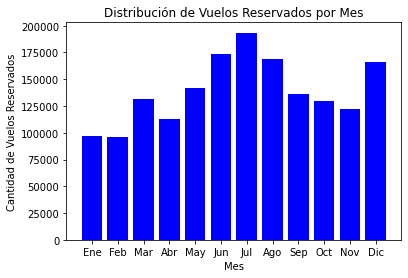

In [56]:


# Creo una nueva columna para unir mes y año y asigno el día 1 por especificar un día del mes
df_final['FechaReserva'] = pd.to_datetime(df_final[['Year', 'Month']].assign(DAY=1))

# Crea una nueva columna 'MesReserva' que represente el mes de cada reserva
df_final['MesReserva'] = df_final['FechaReserva'].dt.month

# Agrupa por mes y suma la cantidad de vuelos reservados en cada mes
reservas_por_mes = df_final.groupby('MesReserva')['Flights Booked'].sum()

# Crea la gráfica de barras
plt.bar(reservas_por_mes.index, reservas_por_mes.values, color='blue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.title('Distribución de Vuelos Reservados por Mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()


COMENTAR La GRÁFICA DESPUÉS

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

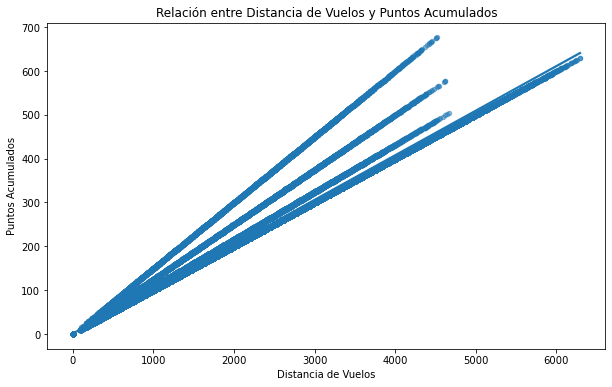

In [60]:
# Crear una figura y ejes para la gráfica de dispersión
plt.figure(figsize=(10, 6))

# Utilizar seaborn para crear un gráfico de dispersión con línea de regresión
sns.regplot(x='Distance', y='Points Accumulated', data=df_final, scatter_kws={'s': 20, 'alpha': 0.5})

# Personalizar la gráfica
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia de Vuelos')
plt.ylabel('Puntos Acumulados')

# Mostrar la gráfica
plt.show()


COMENTAR LA GRÁFICA

3. ¿Cuál es la distribución de los clientes por provincia o estado?

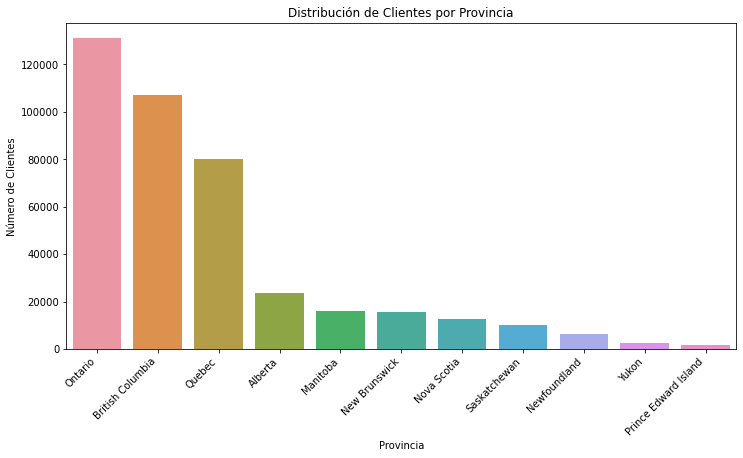

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras para la distribución de clientes por provincia
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', data=df_final, order=df_final['Province'].value_counts().index)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.show()


COMENTAR LA GRÁFICA MÁS TARDE

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

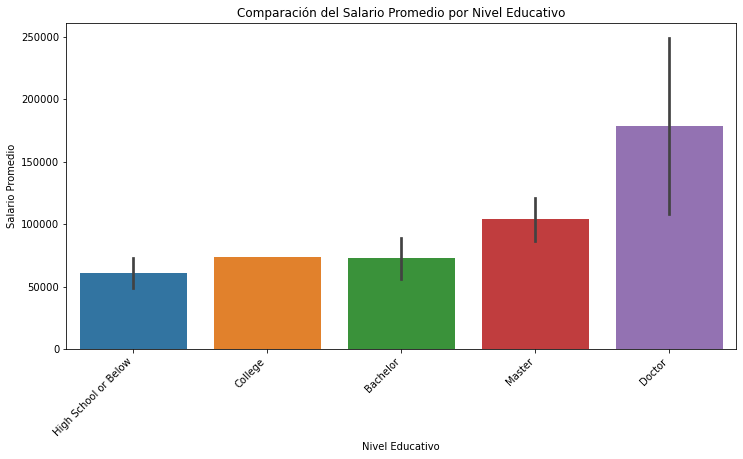

In [65]:
# Establecer el orden deseado para las columnas de nivel educativo
education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

# Crear un gráfico de barras para comparar el salario promedio por nivel educativo
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Salary', data=df_final, order=education_order, ci='sd')
# 'order' especifica el orden deseado para las columnas
# 'ci' muestra la barra de error (desviación estándar)

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title('Comparación del Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.show()

COMENTAR LA GRÁFICA

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

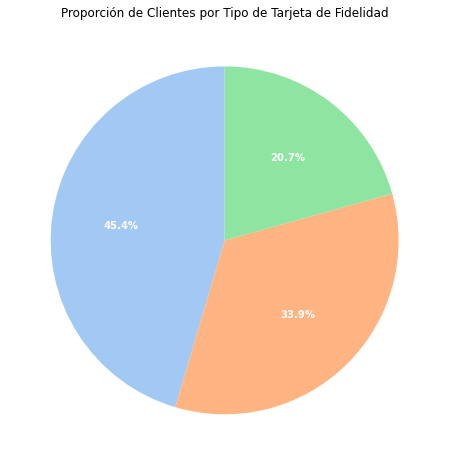

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la proporción de clientes por tipo de tarjeta de fidelidad
loyalty_counts = df_final['Loyalty Card'].value_counts()
total_clients = len(df_final)
loyalty_proportions = loyalty_counts / total_clients

# Crear un gráfico de torta con etiquetas mejoradas
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(loyalty_proportions, labels=loyalty_proportions.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'color': 'w', 'weight': 'bold'})
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.show()


COMENTAR LA GRÁFICA

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

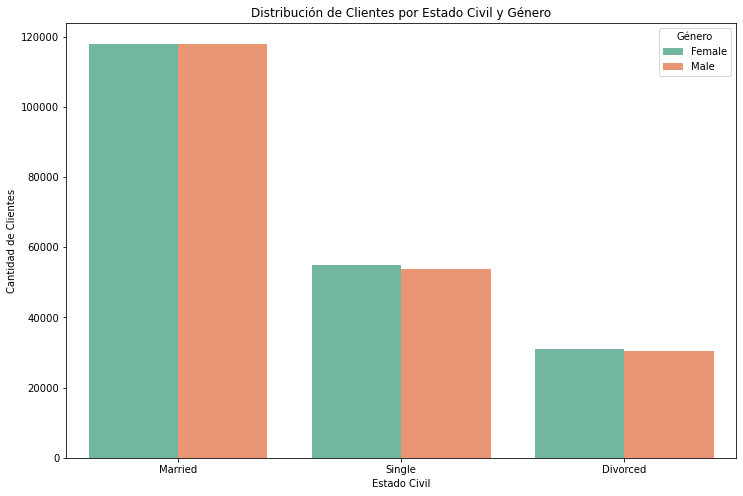

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras apiladas para la distribución de clientes por estado civil y género
plt.figure(figsize=(12, 8))
sns.countplot(x='Marital Status', hue='Gender', data=df_final, palette='Set2')
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Género', loc='upper right')
plt.show()


COMENTAR LA GRÁFICA

FASE 3: EVALUACIÓN DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO


1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [70]:
df_final['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [71]:
df_final ["Flights Booked"].unique()

array([ 3,  2,  6,  4,  0, 10,  9, 13,  1, 14,  7,  5, 11, 17,  8, 15, 12,
       16, 20, 18, 19, 21])

In [78]:
# Hay que filtrar el conjunto de datos#
df_colum_filtradas2 = df_final[['Flights Booked', 'Education']]

# Mostrar las primeras filas del conjunto de datos filtrado
print(df_colum_filtradas2.head())


                Flights Booked Education
Loyalty Number                          
100018                       3  Bachelor
100018                       2  Bachelor
100018                       6  Bachelor
100018                       4  Bachelor
100018                       0  Bachelor


2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [79]:
df_colum_filtradas2['Education Category'] = df_final['Education'].apply(lambda x: 'Graduate or Below' if x in ['High School or Below', 'College', 'Bachelor'] else 'Postgraduate')
df_colum_filtradas2

,Flights Booked,Education,Education Category
Loyalty Number,,,
100018,3,Bachelor,Graduate or Below
100018,2,Bachelor,Graduate or Below
100018,6,Bachelor,Graduate or Below
100018,4,Bachelor,Graduate or Below
100018,0,Bachelor,Graduate or Below
...,...,...,...
999986,15,Bachelor,Graduate or Below
999986,0,Bachelor,Graduate or Below
999986,6,Bachelor,Graduate or Below


In [80]:
estadisticas_vuelos_educacion = df_colum_filtradas2.groupby('Education Category')['Flights Booked'].describe()
estadisticas_vuelos_educacion

,count,mean,std,min,25%,50%,75%,max
Education Category,,,,,,,,
Graduate or Below,375432.0,4.111301,5.224839,0.0,0.0,1.0,8.0,21.0
Postgraduate,30192.0,4.161698,5.233815,0.0,0.0,1.0,8.0,21.0


3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

H= Hipótesis nula: No existe diferencia significativa en el número de vuelos reservados entre el grupo de menor nivel educativo y el de mayor nivel educativo. 
H1: Hipótesis alternativa: Sí existe diferencia significativa en el número de vuelos reservados entre el grupo de menor nivel educativo y el de mayor nivel educativo.

In [81]:
import scipy.stats as stats

# Filtrar los datos para los niveles educativos de interés
graduate_or_below_flights = df_colum_filtradas2[df_colum_filtradas2['Education Category'] == 'Graduate or Below']['Flights Booked']
postgraduate_flights = df_colum_filtradas2[df_colum_filtradas2['Education Category'] == 'Postgraduate']['Flights Booked']

# Realizar una prueba t independiente
t_statistic, p_value = stats.ttest_ind(graduate_or_below_flights, postgraduate_flights, equal_var=False)

# Imprimir el resultado de la prueba
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Tomar una decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el número de vuelos reservados entre los niveles educativos 'Graduate or Below' y 'Postgraduate'.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")


T-statistic: -1.6098836406577404
P-value: 0.10743222651379422
No hay suficiente evidencia para rechazar la hipótesis nula.
